In [1]:
import ndude_sim as sim

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

source = "Einstein256_256"
delta = 0.1;
k, est_loss, err_dude_k, err_nn_k, x_dude_hat, x_nn_hat, x, z = sim.simulate_ndude(source=source, k_max=7, delta=delta, relmodel=True)

Using TensorFlow backend.


Lnew: [[ 1.025  1.25   0.   ]
 [ 1.025  0.     1.25 ]]
k range:  range(1, 8)
k= 1
error_nn= 0.107116699219
error_dude= 0.100784301758
k= 2
error_nn= 0.0961303710938
error_dude= 0.0941925048828
k= 3
error_nn= 0.0938720703125
error_dude= 0.092041015625
k= 4
error_nn= 0.0921020507813
error_dude= 0.0917816162109
k= 5
error_nn= 0.0537719726563
error_dude= 0.0547790527344
k= 6
error_nn= 0.0543060302734
error_dude= 0.0584106445313
k= 7
error_nn= 0.0526580810547
error_dude= 0.0630950927734
Finished error evaluation


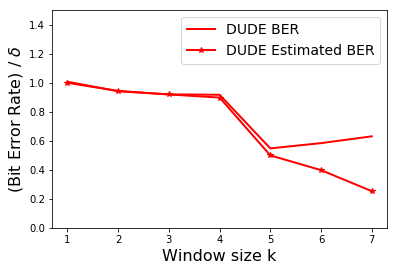

In [2]:
plt.plot(k,err_dude_k/delta,'r',linewidth=2.0)
plt.plot(k,est_loss[0,:]/delta,'r-*',linewidth=2.0)
# plt.plot(k,0.558*np.ones(15),'k',linewidth=2.0)
plt.ylim((0,1.5))
plt.xlabel('Window size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
plt.legend(['DUDE BER','DUDE Estimated BER'],loc='upper right',fontsize=14)
# plt.savefig('/Users/tsmoon/Dropbox/Professional/Research/1. Papers/2016/ICML/Neural universal denoiser/figures/Einstein_dude_est_ber.pdf')

0.1


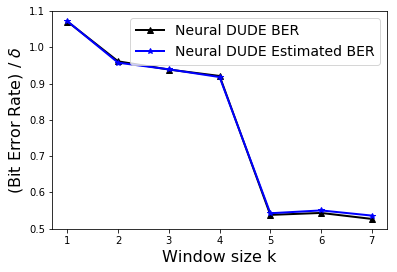

In [3]:
plt.plot(k,err_nn_k/delta,'k-^',linewidth=2.0)
plt.plot(k,est_loss[1,:]/delta,'b-*',linewidth=2.0)
# plt.plot(k,0.558*np.ones(15),'k',linewidth=2.0)
print(delta)
#plt.ylim((0,1))
plt.xlabel('Window size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
plt.legend(['Neural DUDE BER','Neural DUDE Estimated BER'],loc='upper right',fontsize=14)
# plt.savefig('/Users/tsmoon/Dropbox/Professional/Research/1. Papers/2016/ICML/Neural universal denoiser/figures/Einstein_n_dude_est_ber.pdf')

In [4]:
matplotlib.rcParams['text.usetex'] = True

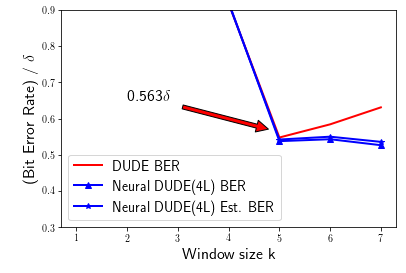

In [5]:
plt.plot(k,err_dude_k/delta,'r',linewidth=2.0)
plt.plot(k,err_nn_k/delta,'b-^',linewidth=2.0)
plt.plot(k,est_loss[1,:]/delta,'b-*',linewidth=2.0)

plt.legend(['DUDE BER','Neural DUDE(4L) BER','Neural DUDE(4L) Est. BER'],fontsize=14)
plt.ylim((0.3,0.9))
plt.xlabel('Window size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
plt.annotate('0.404$\delta$', xy=(36, 0.404), xytext=(30, 0.6),
            arrowprops=dict(facecolor='blue', shrink=0.1),fontsize=16
            )
plt.annotate('0.563$\delta$', xy=(5, 0.563), xytext=(2, 0.65),
            arrowprops=dict(facecolor='red', shrink=0.1),fontsize=16
            )
# plt.savefig('/Users/tsmoon/Dropbox/Professional/Research/1. Papers/2016/NIPS_camera_ready/figures/Einstein_delta_0_1_k_40.pdf')

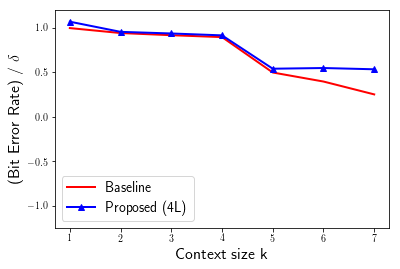

In [6]:
plt.plot(k,est_loss[0,]*10,'r',linewidth=2.0)
plt.plot(k,est_loss[1,]*10,'b-^',linewidth=2.0)
plt.legend(['Baseline','Proposed (4L)'],fontsize=14)
# plt.legend(['DUDE','Neural DUDE (4L)'])

plt.ylim((-1.25,1.2))
plt.xlabel('Context size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
# plt.savefig('lena_est_ber_k_27_nrf.pdf')

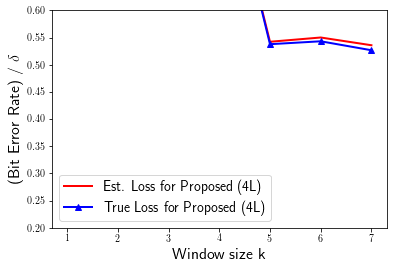

In [7]:
plt.plot(k,est_loss[1,]*10,'r',linewidth=2.0)
plt.plot(k,err_nn_k*10,'b-^',linewidth=2.0)
plt.ylim((0.2,0.6))
plt.legend(['Est. Loss for Proposed (4L)','True Loss for Proposed (4L)'],fontsize=14)
# plt.legend(['Est. Loss for Neural DUDE (4L)','True Loss for Neural DUDE (4L)'])

plt.xlabel('Window size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
# plt.savefig('lena_est_true_ber_neural_dude_nrf.pdf')

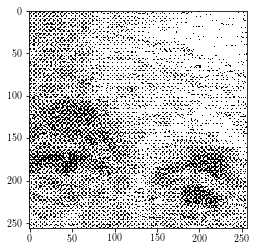

In [8]:
plt.imshow(x_dude_hat.reshape((256,256)),cmap=plt.cm.gray)

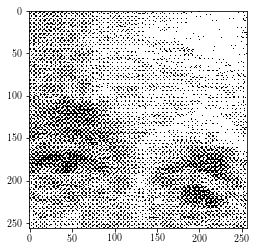

In [9]:
plt.imshow(x_nn_hat.reshape((256,256)),cmap=plt.cm.gray)

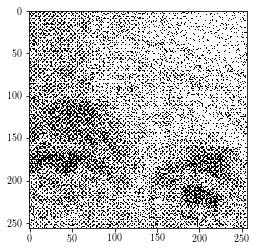

In [10]:
plt.imshow(z.reshape((256,256)),cmap=plt.cm.gray)

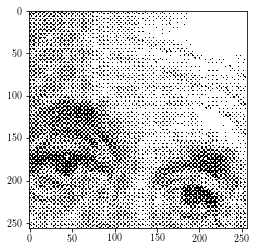

In [11]:
plt.imshow(x.reshape((256,256)),cmap=plt.cm.gray)